In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [191]:
aff_file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Help-Seeking/Data/Affectiva Features/p9_aff_features.csv'
aff = pd.read_csv(aff_file)

In [88]:
aff.head()

,session_num,timestamp,aff_Attention,aff_BrowFurrow,aff_BrowRaise,aff_CheekRaise,aff_ChinRaise,aff_Contempt,aff_Dimpler,aff_Disgust,...,aff_LipSuck,aff_MouthOpen,aff_NoseWrinkle,aff_Sadness,aff_Smile,aff_Smirk,aff_Surprise,aff_UpperLipRaise,aff_Valence,aff_aff_Anger
0,16.0,1.06667,78.2544,0.000040,0.201832,0.000035,0.012202,0.196619,0.001938,0.445944,...,0.000031,1.28752,7.776090e-07,0.023086,0.008405,0.197090,0.203062,0.000004,0.0,0.002027
1,16.0,1.13333,91.5347,0.096024,0.013899,0.010930,0.006191,0.185752,0.000732,0.420472,...,0.000002,1.00725,6.007550e-03,0.022732,0.543568,0.021768,0.198092,0.001740,0.0,0.001974
2,16.0,1.20000,97.4094,0.058420,0.049919,0.000843,0.003013,0.192026,0.000539,0.434282,...,0.000002,1.24202,1.954850e-04,0.023098,0.065112,0.003927,0.200022,0.000119,0.0,0.002048
3,16.0,1.26667,91.8342,0.046713,0.026104,0.007257,0.036189,0.189974,0.003262,0.452871,...,0.000017,4.15861,5.308090e-03,0.020629,0.229787,0.020895,0.215938,0.003396,0.0,0.002234
4,16.0,1.33333,91.5356,0.013484,0.024152,0.004416,0.222106,0.191321,0.003339,0.444446,...,0.000021,2.74203,1.741100e-02,0.020901,0.154101,0.039968,0.210500,0.013794,0.0,0.002138


In [89]:
aud_file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Help-Seeking/Data/Audio Features/Praat/combined data/P9/P9_FS_combined.csv'
rest = pd.read_csv(aud_file)

In [192]:
aff.loc[aff.session_num == 13.3, 'session_num'] = 13.0

In [91]:
print(aff['session_num'].unique())
print(rest['session_num'].unique())

[16.  15.   4.   9.   3.1  3.2 13. ]
[ 3.1  3.2  4.   9.  13.  15. ]


In [92]:
rest['timestamp'] = round(rest['timestamp'], 5)

In [93]:
rest = rest.sort_values(['session_num', 'timestamp'], ascending=[True, True])
aff = aff.sort_values(['session_num', 'timestamp'], ascending=[True, True])

In [10]:
for i in range(10):
    print(rest.loc[i, 'timestamp'], aff.loc[i, 'timestamp'])

64.43333 1.06667
64.46667 1.13333
64.5 1.2
64.53333 1.26667
64.56667 1.33333
64.6 1.4
64.63333 1.46667
64.66667 1.53333
64.7 1.56667
64.73333 1.63333


In [11]:
len(aff)/len(rest)

0.11678169719760857

# Audio Analysis: Percentile

In [12]:
rest.columns

Index(['of_confidence', 'of_success', 'of_gaze_0_x', 'of_gaze_0_y',
       'of_gaze_0_z', 'of_gaze_1_x', 'of_gaze_1_y', 'of_gaze_1_z',
       'of_gaze_angle_x', 'of_gaze_angle_y', 'of_gaze_distance', 'of_pose_Tx',
       'of_pose_Ty', 'of_pose_Tz', 'of_pose_Rx', 'of_pose_Ry', 'of_pose_Rz',
       'of_pose_distance', 'of_AU01_c', 'of_AU02_c', 'of_AU04_c', 'of_AU05_c',
       'of_AU06_c', 'of_AU07_c', 'of_AU09_c', 'of_AU10_c', 'of_AU12_c',
       'of_AU14_c', 'of_AU15_c', 'of_AU17_c', 'of_AU20_c', 'of_AU23_c',
       'of_AU25_c', 'of_AU26_c', 'of_AU28_c', 'of_AU45_c',
       'op_Number of People', 'timestamp', 'session_num', 'participant',
       'games_total', 'games_session', 'mistakes_total', 'mistakes_session',
       'mistakes_game', 'ts_robot_talked', 'ts_game_start', 'ts_attempt',
       'aptitude', 'diff_1', 'diff_2', 'diff_3', 'diff_4', 'diff_5',
       'skill_NC', 'skill_OS', 'skill_EM', 'no_game', 'engagement',
       'harmonicity', 'intensity', 'mfcc_0', 'mfcc_1', 'pitch_freq

[56.928999999999995, 55.155, 71.596, 59.766000000000005]
[54.174, 63.028, 53.724, 52.58]

[19.716523787654285, 19.46340834698345, 19.162562957166685, 19.70928982949495]
[19.28087054453764, 20.878364214578767, 18.926277916686157, 18.74283843727665]


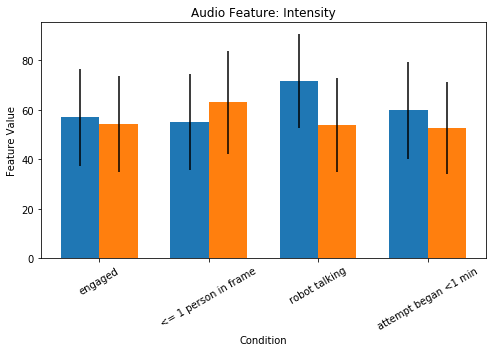

In [74]:
feature = 'intensity'

examine = ['engagement', 'op_Number of People', 'ts_robot_talked', 'ts_attempt']

aud_1 = []
aud_2 = []

aud_1_std = []
aud_2_std = []

for e in examine:
    
    if (e == 'engagement'):
        d1 = rest.loc[rest['engagement'] == 1]
        d2 = rest.loc[rest['engagement'] == 0]
    elif (e == 'op_Number of People'):
        d1 = rest.loc[rest['op_Number of People'] <= 1]
        d2 = rest.loc[rest['op_Number of People'] > 1]       
    elif (e == 'ts_robot_talked'):
        d1 = rest.loc[rest['ts_robot_talked'] == 0]
        d2 = rest.loc[rest['ts_robot_talked'] > 0]       
    elif (e == 'ts_attempt'):
        d1 = rest.loc[rest['ts_attempt'] <= 60]
        d2 = rest.loc[rest['ts_attempt'] > 60]       

    aud_1.append(np.nanmedian(d1[feature]))
    aud_1_std.append(np.nanstd(d1[feature]))
    
    aud_2.append(np.nanmedian(d2[feature]))
    aud_2_std.append(np.nanstd(d2[feature]))  
    
print(aud_1)
print(aud_2)

print()

print(aud_1_std)
print(aud_2_std)

plt.rcParams["figure.figsize"] = [7,5]

fig, ax = plt.subplots()

index = np.arange(len(examine))
bar_width = 0.35

rects1 = ax.bar(index, aud_1, bar_width, yerr=aud_1_std)
rects2 = ax.bar(index+bar_width, aud_2, bar_width, yerr=aud_2_std)

ax.set_xlabel('Condition')
ax.set_ylabel('Feature Value')
ax.set_title('Audio Feature: Intensity')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('engaged', '<= 1 person in frame', 'robot talking', 'attempt began <1 min'))
plt.xticks(rotation=30)
fig.tight_layout()

plt.show()

[-200.0, 54.174, 831.855, 351.707, 704.9010000000001, 0.433]
[-200.0, 56.928999999999995, 920.4960000000001, 383.24800000000005, 713.414, 0.426]

[84.07810785499048, 19.28087054453764, 881.1731408984117, 98.1478551645223, 1450.397721615419, 0.25957224089738345]
[95.60210760144834, 19.716523787654285, 896.150637072052, 103.71672097826637, 1560.3378177573352, 0.26044017181711976]


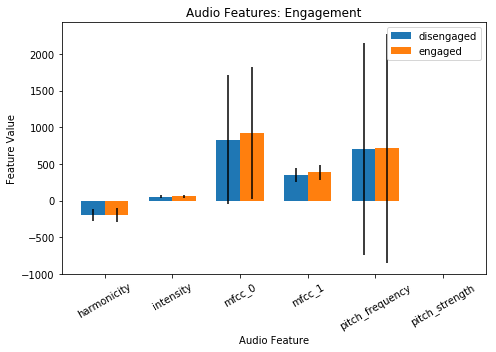

In [80]:
audio = ['harmonicity', 'intensity', 'mfcc_0', 'mfcc_1', 'pitch_frequency', 'pitch_strength']

aud_en = []
aud_dis = []

aud_en_std = []
aud_dis_std = []

d_en = rest.loc[rest['engagement'] == 0]
d_dis = rest.loc[rest['engagement'] == 1]

for a in audio:
    aud_en.append(np.nanmedian(d_en[a]))
    aud_en_std.append(np.nanstd(d_en[a]))
    
    aud_dis.append(np.nanmedian(d_dis[a]))
    aud_dis_std.append(np.nanstd(d_dis[a]))  
    
print(aud_en)
print(aud_dis)

print()

print(aud_en_std)
print(aud_dis_std)

plt.rcParams["figure.figsize"] = [7,5]

fig, ax = plt.subplots()

index = np.arange(6)
bar_width = 0.35

rects1 = ax.bar(index, aud_en, bar_width, yerr=aud_en_std, label='disengaged')
rects2 = ax.bar(index+bar_width, aud_dis, bar_width, yerr=aud_dis_std, label='engaged')

ax.set_xlabel('Audio Feature')
ax.set_ylabel('Feature Value')
ax.set_title('Audio Features: Engagement')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('harmonicity', 'intensity', 'mfcc_0', 'mfcc_1', 'pitch_frequency', 'pitch_strength'))
ax.legend()
plt.xticks(rotation=30)
fig.tight_layout()

plt.show()

# Affectiva Analysis: Percentile

In [193]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Help-Seeking/Data/FS/p9_FS.csv'
rest = pd.read_csv(file)

In [194]:
rest = rest.sort_values(['session_num', 'timestamp'], ascending=[True, True])
aff = aff.sort_values(['session_num', 'timestamp'], ascending=[True, True])

In [200]:
aff['session_num'].unique()

array([ 3.1,  3.2,  4. ,  9. , 13. , 15. ])

In [196]:
aff = aff.loc[aff['session_num']!=16.0]

In [197]:
rest['timestamp'] = round(pd.to_numeric(rest['timestamp']), 4)

In [198]:
aff2 = pd.merge(aff, rest, how='left', on=['session_num', 'timestamp'])

In [199]:
aff2['engagement'].isna().sum()

25025

In [189]:
len(aff)

37048

In [190]:
aff.loc[20000:20050, 'timestamp']

20000    1299.03
20001    1299.10
20002    1299.17
20003    1299.23
20004    1299.27
20005    1299.33
20006    1299.40
20007    1299.47
20008    1299.53
20009    1299.60
20010    1299.67
20011    1299.73
20012    1299.77
20013    1299.83
20014    1299.90
20015    1299.97
20016    1300.03
20017    1300.10
20018    1300.17
20019    1300.23
20020    1300.33
20021    1300.40
20022    1300.47
20023    1300.53
20024    1300.60
20025    1302.03
20026    1302.10
20027    1302.17
20028    1302.23
20029    1302.27
20030    1302.33
20031    1302.40
20032    1302.47
20033    1302.53
20034    1302.60
20035    1302.67
20036    1302.73
20037    1302.77
20038    1302.83
20039    1302.90
20040    1302.97
20041    1303.03
20042    1303.10
20043    1303.17
20044    1303.23
20045    1303.27
20046    1303.33
20047    1303.40
20048    1303.47
20049    1303.53
20050    1303.60
Name: timestamp, dtype: float64

In [150]:
cs = np.array(rest.columns).tolist()
cs.remove('timestamp')
cs.remove('session_num')

cs = ['timestamp', 'session_num'] + cs
rest = rest[cs]

In [156]:
rest.loc[500:550, :]

,timestamp,session_num,of_confidence,of_success,of_gaze_0_x,of_gaze_0_y,of_gaze_0_z,of_gaze_1_x,of_gaze_1_y,of_gaze_1_z,...,diff_1,diff_2,diff_3,diff_4,diff_5,skill_NC,skill_OS,skill_EM,no_game,engagement
500,81.100,3.1,0.03,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,1,0,0,0.0
501,81.133,3.1,0.03,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,1,0,0,0.0
502,81.167,3.1,0.03,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,1,0,0,0.0
503,81.200,3.1,0.03,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,1,0,0,0.0
504,81.233,3.1,0.03,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,1,0,0,0.0
505,81.267,3.1,0.03,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,1,0,0,0.0
506,81.300,3.1,0.03,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,1,0,0,0.0
507,81.333,3.1,0.03,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,1,0,0,0.0
508,81.367,3.1,0.03,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,1,0,0,0.0
509,81.400,3.1,0.47,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,1,0,0,0.0


In [164]:
init = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Help-Seeking/Data/Affectiva Features/P9/p9_s15_2018-07-07_aff_features.csv'
data = pd.read_csv(init)

In [170]:
aff['timestamp']

31313      25.200
31314      25.267
31315      43.200
31316      43.267
31317      43.333
31318      43.400
31319      43.767
31320      43.833
31321      43.900
31322      43.967
31323      44.033
31324      44.100
31325      44.133
31326      57.267
31327      60.100
31328      60.133
31329      60.200
31330      67.967
31331      68.033
31332      68.100
31333      68.167
31334      68.233
31335      68.267
31336      69.667
31337      76.967
31338      77.033
31339      80.333
31340      80.400
31341      80.467
31342      80.533
           ...   
14783    2695.170
14784    2695.300
14785    2695.370
14786    2695.430
14787    2695.500
14788    2695.530
14789    2695.600
14790    2695.670
14791    2695.730
14792    2695.800
14793    2695.870
14794    2695.930
14795    2696.000
14796    2696.030
14797    2696.100
14798    2696.800
14799    2696.870
14800    2696.930
14801    2697.000
14802    2697.030
14803    2697.100
14804    2697.170
14805    2697.230
14806    2697.300
14807    2